In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
data = pd.read_csv('/Users/omerkatz/Downloads/mnist_test.csv')

In [10]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
a = data.iloc[0,1:].values

In [14]:
a =a.reshape(28,28).astype('uint8')

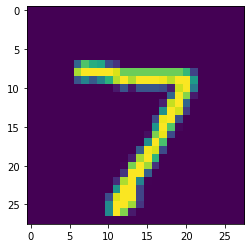

In [16]:
plt.imshow(a)

In [17]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size =0.2 ,random_state=4)

In [20]:
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x_test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_train.head()

4983    3
6789    1
2221    1
6043    5
1564    7
Name: label, dtype: int64

In [23]:
y_test.head()

1603    1
8713    3
4561    7
6600    5
2558    5
Name: label, dtype: int64

In [111]:
df_compare =  pd.DataFrame(columns=['N','Score'])
for i in range(5,100,10):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train,y_train)
    new_row = {'N': i,'Score':rf.score(x_test,y_test) }
    df_compare = df_compare.append(new_row,ignore_index=True)


# Below we have forests with n trees with their corresponding score

In [112]:
df_compare.style.hide_index()

N,Score
5.000000,0.858000
15.000000,0.924000
25.000000,0.935000
35.000000,0.935000
45.000000,0.941000
55.000000,0.940500
65.000000,0.946000
75.000000,0.948000
85.000000,0.942500
95.000000,0.948000


In [91]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_test

1603    1
8713    3
4561    7
6600    5
2558    5
       ..
1944    0
5978    1
9809    0
4014    1
5652    0
Name: label, Length: 2000, dtype: int64

In [95]:
pred =rf.predict(x_test)

In [96]:
s = y_test.values


In [55]:
len(s)

2000

In [97]:
count = 0 
count_wrong = 0
for i in range(len(pred)):
    if pred[i] == s[i]:
        count += 1
    else: count_wrong += 1
    


In [102]:
count 

1896

In [100]:
rf.score(x_test,y_test)

0.948